<a href="https://colab.research.google.com/github/nightsread/Time-Series-Analysis-Visualization-in-Python/blob/main/Distribution_of_Headquarters.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
import os
import requests
from bs4 import BeautifulSoup
import pandas as pd
from google.colab import drive

# Mount Google Drive
drive.mount('/content/drive')

url = 'https://en.wikipedia.org/wiki/List_of_largest_manufacturing_companies_by_revenue'
response = requests.get(url)
soup = BeautifulSoup(response.text, 'html.parser')

# Find the table
table = soup.find('table', {'class': 'wikitable sortable plainrowheads'}).tbody

# Get all rows
rows = table.find_all('tr')

# Get the columns
columns = [v.text.replace('\n', '') for v in rows[0].find_all('th')]

# Initialize a list to collect rows
data = []

# Iterate through the rows and collect the data
for i in range(1, len(rows)):
    tds = rows[i].find_all('td')

    if len(tds) == 4:
        values = [
            tds[0].text.strip(),
            tds[1].text.strip(),
            '',
            tds[2].text.strip(),
            tds[3].text.strip().replace('\n', '').replace('\xa0', '')
        ]
    else:
        values = [td.text.strip().replace('\n', '').replace('\xa0', '') for td in tds]

    # Append the row to the data list
    data.append(values)

# Create the DataFrame from the list of data
df = pd.DataFrame(data, columns=columns)

# Define the directory and file path
directory = "/content/drive/My Drive/webscraping"
file_path = os.path.join(directory, "manufactureTop10.csv")

# Check if directory exists and create it if it does not
if not os.path.exists(directory):
    os.makedirs(directory)

# Save the DataFrame to a CSV file
df.to_csv(file_path, index=False)

print(f"Data has been successfully scraped and saved to '{file_path}'.")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Data has been successfully scraped and saved to '/content/drive/My Drive/webscraping/manufactureTop10.csv'.


In [ ]:
import pandas as pd
df = pd.read_csv ("/content/drive/My Drive/webscraping/manufactureTop10.csv")

df

,No.,Company,Industry,Revenue (by US$ billion),Headquarters
0,1,Apple,"Electronics, telecommunications equipment",274.515,United States
1,2,Toyota Group,"Engineering, various",256.721,Japan
2,3,Volkswagen Group,Automotive,253.965,Germany
3,4,Samsung Electronics,"Electronics, various",200.734,South Korea
4,5,Foxconn,Electronics,181.945,Taiwan
5,6,Mercedes-Benz Group,Automotive,175.827,Germany
6,7,Cardinal Health,Pharmaceuticals,152.922,United States
7,8,China Railway and Engineering Group,Engineering,141.383,China
8,9,Huawei,"Telecommunications equipment, electronics",129.183,China
9,10,Ford,Automotive,127.144,United States


In [ ]:
import pandas as pd

df = pd.read_csv ("/content/drive/My Drive/webscraping/manufactureTop10.csv")

df_cleaned = df[['Revenue (by US$ billion)',	'Headquarters']]

print(df_cleaned)

    Revenue (by US$ billion)               Headquarters
0                    274.515              United States
1                    256.721                      Japan
2                    253.965                    Germany
3                    200.734                South Korea
4                    181.945                     Taiwan
5                    175.827                    Germany
6                    152.922              United States
7                    141.383                      China
8                    129.183                      China
9                    127.144              United States
10                   124.240                      Japan
11                   122.485              United States
12                   121.542                      Japan
13                   112.794                    Germany
14                   107.555                      China
15                   102.014                      China
16                   101.075                    

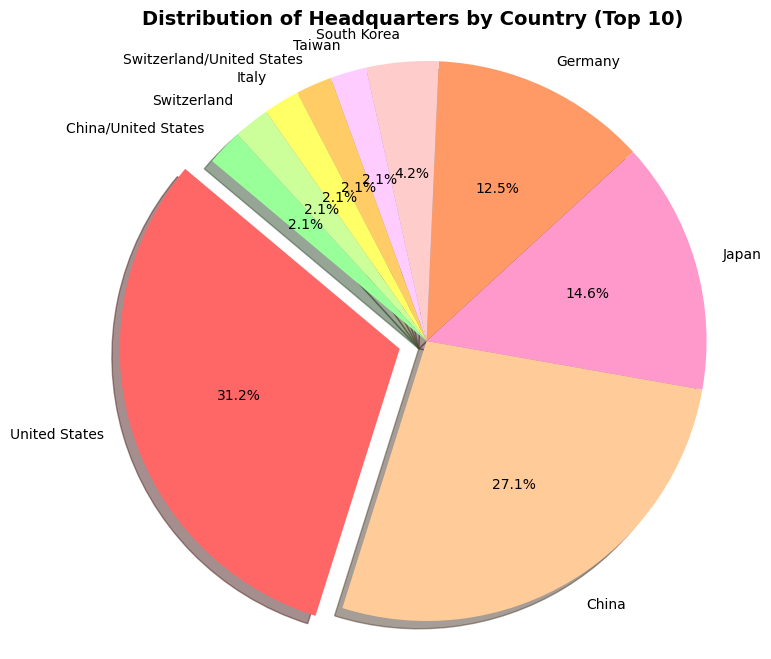

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Read data from CSV file
df = pd.read_csv("/content/drive/My Drive/webscraping/manufactureTop10.csv")

# Select relevant columns
df_cleaned = df[['Revenue (by US$ billion)', 'Headquarters']]

colors = [
    '#FF6666', '#FFCC99', '#FF99CC', '#FF9966', '#FFCCCC',
    '#FFCCFF', '#FFCC66', '#FFFF66', '#CCFF99', '#99FF99',
    '#99FFFF', '#66CCFF', '#6666FF', '#CC99FF', '#FF99FF'
]

# Count the number of headquarters by country
headquarters_count = df_cleaned['Headquarters'].value_counts().head(10)  # Take only the top 10 data points

# Define explode values
explode = tuple(0.1 if i == 0 else 0 for i in range(len(headquarters_count)))

# Plotting the pie chart
plt.figure(figsize=(8, 8))
plt.pie(headquarters_count, labels=headquarters_count.index, explode=explode, autopct='%1.1f%%', shadow=True, startangle=140, colors=colors)
plt.title('Distribution of Headquarters by Country (Top 10)', fontsize=14, fontweight='bold')

# Equal aspect ratio ensures that pie is drawn as a circle
plt.axis('equal')

# Show plot
plt.show()
